##Q-1:
Consider the OR gate truth table as discussed in class

a. Write a python code implementing logistic regression (using gradient
descent) from scratch and use the same to replicate OR gate

b. Modify the code for AND and XOR gates.

Comment on the meaning of the converged weights you obtained above.

In [123]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
#random initialize weights and bias:

def initialize(nums):
  b = np.random.random()
  w = np.random.randn(nums)
  return w,b

In [125]:
w,b = initialize(4)
print(w,b)

[ 0.5401992  -0.10285751 -0.13266819 -0.11479573] 0.16673284798951182


In [126]:
# calculating value of y with weights and bias

def cal_y(z):
  #z = x.dot(w)
  #m, n = x.shape
  #z = z + b
  
  y = 1/(1+ np.exp(-z))

  return y

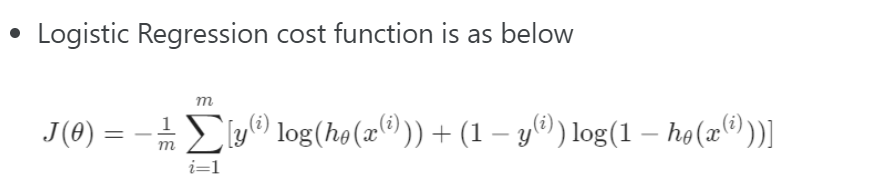

In [127]:
#calculationg cost function:
import math
def get_cost(x,w,y):
  z = x.dot(w)
  m, n = x.shape
  #z = z + b/m
  z = cal_y(z)
  J = -(y.T.dot(np.log(z)) + (1-y).T.dot(np.log(1- z)))/m
  #J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

  return J,z

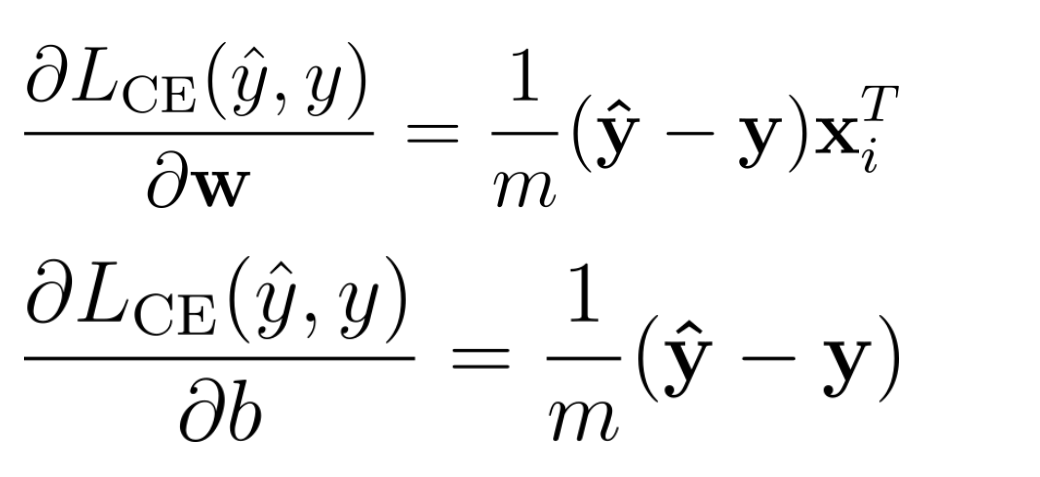

In [128]:
#updating the weights and bias
def update_theta(x,y,y_hat,theta_o,learning_rate,b_0):
    #d = x.dot(theta_o)
    m, n = x.shape
    db=(np.sum(y_hat-y))/m
    dw=(np.dot((y_hat-y),x))/m
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return theta_1,b_1


In [129]:
#writing a function for gradient descent
def run_gradient_descent(X,Y,alpha,num_iterations):
    theta,b=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
      #Y_hat=cal_y(X)
      this_cost,z=get_cost(X,theta,Y)
      prev_b=b
      prev_theta=theta
      theta,b=update_theta(X,Y,z,prev_theta,alpha, prev_b)
      if(iter_num%10==0):
        gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
        result_idx=result_idx+1
      iter_num +=1

    print('Final Estimate theta and probalities: ',theta, z)
    return gd_iterations_df,theta


In [130]:
# Our data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# The ground truth (i.e., what OR returns and our perceptron should learn to produce)
Y = np.array([0, 1, 1, 1])

In [131]:
m,n = X.shape
X = np.hstack((np.ones((m,1)),X))    #considering bias term in X
X

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

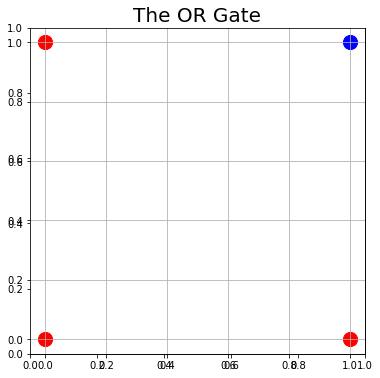

In [132]:
#plotting the gate
#the size of each data point
area = 200
fig = plt.figure(figsize=(6, 6))
plt.title('The OR Gate', fontsize=20)
ax = fig.add_subplot(111)
# color red: is class 0 and color blue is class 1.
ax.scatter(0, 0, s=area, c='r', label="Class 0")
ax.scatter(0, 1, s=area, c='r', label="Class 1")
ax.scatter(1, 0, s=area, c='r', label="Class 1")
ax.scatter(1, 1, s=area, c='b', label="Class 1")
plt.grid()
plt.show()

In [133]:
gd_iterations_df,theta=run_gradient_descent(X,Y,alpha=0.1,num_iterations=1000)

Final Estimate theta and probalities:  [-1.59244927  4.30817671  4.1840499 ] [0.1691672  0.93026325 0.93790937 0.99899055]


In [134]:
gd_iterations_df

,iteration,cost
0,0.0,1.108940
1,10.0,0.722740
2,20.0,0.528735
3,30.0,0.427630
4,40.0,0.370268
...,...,...
95,950.0,0.083961
96,960.0,0.083272
97,970.0,0.082593
98,980.0,0.081924


Text(0, 0.5, 'Cost')

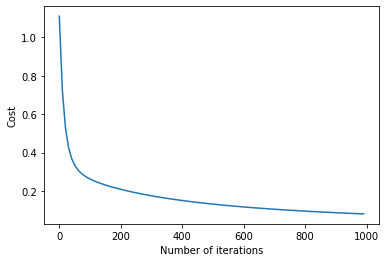

In [135]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

In [136]:

def predict(theta, X,b):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters theta.
    Using threshold value 0.5 to convert probability value to class value 

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    z = X.dot(theta)
    m, n = X.shape
    #z = z + b/m
    p = cal_y(z) > 0.5
    #p = cal_y(X,theta,b).all()
    return p.astype(int)
    #return [1 if p > 0.5 else 0 for p in p]

In [137]:
p = predict(theta, X, b)
print ('Accuracy:', np.mean(p == Y) * 100 )

Accuracy: 100.0


In [138]:
p

array([0, 1, 1, 1])

##AND##


#  data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

The ground truth (i.e., what AND returns and our perceptron should learn to produce)

Y = np.array([0, 1, 1, 1])

In [139]:
#m,n = X.shape
#X = np.hstack((np.ones((m,1)),X))
X     #existing X

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [140]:
Y_and = np.array([0, 0, 0, 1])   #changing to the required output

In [141]:
gd_iterations_df,theta=run_gradient_descent(X,Y_and,alpha=0.1,num_iterations=8100)

Final Estimate theta and probalities:  [-10.62454294   6.96720529   6.96720627] [2.43205266e-05 2.51552565e-02 2.51552325e-02 9.64761506e-01]


Text(0, 0.5, 'Cost')

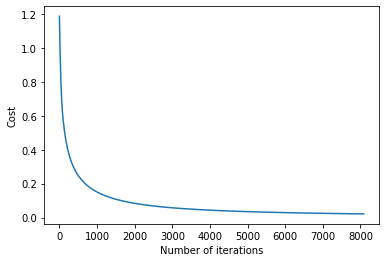

In [142]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

In [143]:
p = predict(theta, X, b)
print ('Accuracy:', np.mean(p == Y_and) * 100 )

Accuracy: 100.0


In [144]:
p

array([0, 0, 0, 1])

##xor gate:##

In [145]:
X

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

gives a true (1 or HIGH) output when the number of true inputs is odd.

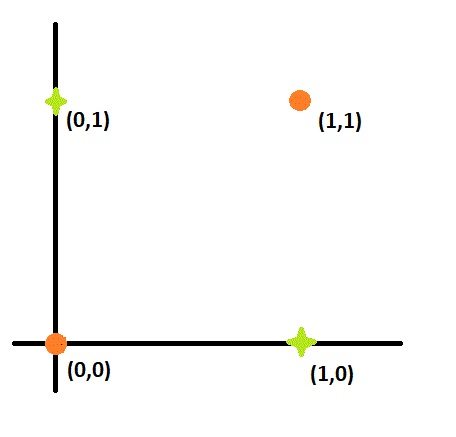

In [146]:
Y_xor = np.array([0, 1, 1, 0])

In [147]:
gd_iterations_df,theta=run_gradient_descent(X,Y_xor,alpha=0.01,num_iterations=500)

Final Estimate theta and probalities:  [ 0.00438094 -0.69128736  0.85707952] [0.5011462  0.7031365  0.33469868 0.54256781]


Text(0, 0.5, 'Cost')

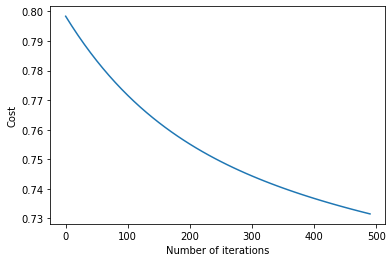

In [148]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

In [149]:
p = predict(theta, X, b)
print ('Accuracy:', np.mean(p == Y_xor) * 100 )

Accuracy: 25.0


In [150]:
#adding a column of linear (multiply inputs) : last column to improve the results
X_new = np.array([[1, 0, 0, 0], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 1]])

In [151]:
gd_iterations_df,theta=run_gradient_descent(X_new,Y_xor,alpha=0.1,num_iterations=10000)

Final Estimate theta and probalities:  [ -3.22447539   6.87000539   6.87000539 -14.57746106] [0.03825894 0.97455407 0.97455407 0.01692621]


In [152]:
p = predict(theta, X_new, b)
print ('Accuracy:', np.mean(p == Y_xor) * 100 )

Accuracy: 100.0


##observation on converged weights

A. for OR gate:

Final Estimate theta and probalities:  [-1.37753442   3.83850968  3.86136147]  [0.20158233 0.9229383  0.92129424 0.99820231]

B. for AND gate:

Final Estimate theta and probalities:  [-10.64482704   6.98075427   6.98075374]  [2.38321288e-05 2.49905651e-02 2.49905779e-02 9.64992400e-01]

C. for XOR gate:

Final Estimate theta and probalities:  [-0.64361554  0.74070368 -0.31614939] [0.34419816 0.27658066 0.52397785 0.44500826]

1. all the final weights have atleast one negative value which is mostly seen where the output is 0. Also, the remaining two weights are very close numerically.
2. Also, when the input is used without considering non- linearity term in XOR gate, the accuracy obtained is 50%. As the problem is not linearly separable. 
3. the sum of w1 and w2 should be greater in magnitude of w0. this is seen to be true in AND and OR gate.

##Q-2
Download the IRIS dataset (https://archive.ics.uci.edu/ml/datasets/iris)

a. Write gradient descent code to perform multiclass classification
using the entire dataset for training

b. Report on the confusion matrix for this

In [153]:
import pandas as pd

In [154]:
#getting the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=[
    "Sepal length (cm)", 
    "Sepal width (cm)", 
    "Petal length (cm)",
    "Petal width (cm)",
    "Species"
])
df

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [155]:
#shuffle array
#np.random.shuffle(np.array(df))

In [156]:
#df = df.sample(frac = 1)  #shuffle dataframe
#df

In [157]:
#getting x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [158]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [159]:
d = len(y)
d

150


**one hot encoding**

In [160]:
y1 = np.ones((d, 3))

#one hot encoding
for i in range(len(y)):
  #print(i)
  if y[i] == 'Iris-setosa':
    y1[i,:]=[1,0,0]
  elif y[i] == 'Iris-versicolor':
    y1[i,:]=[0,1,0]
  else:
    y1[i,:]=[0,0,1]
#y1

sizes of the matices are

x: (150,4)

y: (150,3) encoded

w: (4,3)

In [161]:
def initialize_i():
  b = np.random.random(3)
  w = np.random.randn(4,3)
  return w,b

In [162]:
#calculationg cost function:
import math
def get_cost(x,w,y):
  z = x.dot(w)     #x: (150,4), w:(4,3), z:(150,3)
  m, n = x.shape
  z = z + b/m
  z = cal_y(z)   #(150,3)
  J = (-(y.T.dot(np.log(z)) + (1-y).T.dot(np.log(1- z)))).mean()
  #J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

  return J,z

In [163]:
#updating the weights and bias
def update_theta(x,y,y_hat,theta_o,learning_rate,b_0):
    #d = x.dot(theta_o)
    m, n = x.shape
    db=np.sum((y_hat-y))/m
    dw=(x.T.dot((y_hat-y)))/m
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return theta_1,b_1

In [164]:
#z = x.dot(theta)
#z

In [165]:
#writing a function for gradient descent
def run_gradient_descent(X,Y,alpha,num_iterations):
    
    theta,b=initialize_i()
    #theta = 
    print(theta.shape)
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
      #Y_hat=cal_y(X)
      this_cost,z=get_cost(X,theta,Y)
      prev_b=b
      prev_theta=theta
      theta,b=update_theta(X,Y,z,prev_theta,alpha, prev_b)
      if(iter_num%10==0):
        gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
        result_idx=result_idx+1
      iter_num +=1
      

    print('Final Estimate theta and bias and probalities: ',theta,b, z)


    return gd_iterations_df,theta,b

In [166]:
gd_iterations_df,theta,b=run_gradient_descent(x,y1,alpha=0.1,num_iterations=1000)

(4, 3)
Final Estimate theta and bias and probalities:                            0         1         2
Sepal length (cm)  0.911385  0.773853 -1.997550
Sepal width (cm)   1.438650 -1.700897 -2.539903
Petal length (cm) -2.963922  0.238425  3.136457
Petal width (cm)  -1.577858 -0.909700  2.693912 0    0.965218
1    1.955664
2   -0.615475
dtype: float64             0         1             2
0    0.994613  0.135473  7.222188e-07
1    0.986835  0.239030  3.832685e-06
2    0.991152  0.157554  2.512939e-06
3    0.979984  0.177083  7.404620e-06
4    0.994888  0.109021  6.840548e-07
..        ...       ...           ...
145  0.000181  0.316779  8.179705e-01
146  0.000208  0.521947  8.661028e-01
147  0.000242  0.342814  7.491795e-01
148  0.000113  0.143346  8.920847e-01
149  0.000259  0.277486  8.084742e-01

[150 rows x 3 columns]


In [167]:
#plt.figure
gd_iterations_df

,iteration,cost
0,0.0,455.643699
1,10.0,135.743207
2,20.0,141.107935
3,30.0,145.933069
4,40.0,150.346122
...,...,...
95,950.0,283.342426
96,960.0,284.068756
97,970.0,284.788999
98,980.0,285.503257


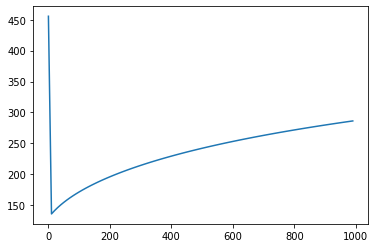

In [168]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])

In [169]:
def predict(theta, X,b):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters theta.
    Using threshold value 0.5 to convert probability value to class value 

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    z = X.dot(theta)
    m, n = X.shape
    #z = z + b/m
    p = cal_y(z)
    #p = cal_y(X,theta,b).all()
    return p
    #return [1 if p > 0.5 else 0 for p in p]

In [170]:
p = predict(theta, x, b)
p = p.to_numpy()
count =0
for i in range(len(y)):
  if np.argmax(y1[i])==np.argmax(p[i]):
    count +=1

acc= count/len(y)
#np.argmax(p[0])   #directly gives the index of max value in array
#print ('Accuracy:', np.mean(p == y) * 100 )
acc,count

(0.9666666666666667, 145)

##accuracy obtained is 96.67%

In [171]:
y_pred = []
for i in range(len(y)):
  if np.argmax(p[i])==0:
      y_pred.append("Iris-setosa")
  elif np.argmax(p[i])==1:
      y_pred.append("Iris-versicolor")
  else:
      y_pred.append("Iris-virginica")
#len(y_pred),y_pred

In [172]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,y_pred)
cm

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 50]])

##confusion matrix

1. the model predicts all correct for the first class i.e. iris setosa.
2. it predicts 46 correct out of 50 for the second class i.e. iris- versicolor. The remaining 4 are wrongly classified as class 3 i.e. iris - virginica.
3. it predicts all correct for the last class i.e. iris - virginica.